# Convolutional Neural Network

In [ ]:
!git clone "https://github.com/NeenuFrancis/apple_Vs_Orange_DataSet.git"

Cloning into 'apple_Vs_Orange_DataSet'...
remote: Enumerating objects: 411, done.
remote: Counting objects: 100% (143/143), done.
remote: Compressing objects: 100% (139/139), done.
remote: Total 411 (delta 13), reused 100 (delta 0), pack-reused 268
Receiving objects: 100% (411/411), 76.88 MiB | 33.63 MiB/s, done.
Resolving deltas: 100% (13/13), done.


In [ ]:

!git clone https://github.com/NeenuFrancis/apple_Vs_Orange_DataSet


fatal: destination path 'apple_Vs_Orange_DataSet' already exists and is not an empty directory.


### Importing the libraries

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
tf.__version__

'2.14.0'




## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [ ]:
import pandas as pd

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

training_set = train_datagen.flow_from_directory('/content/apple_Vs_Orange_DataSet/data/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')


Found 196 images belonging to 2 classes.


### Preprocessing the Test set

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/apple_Vs_Orange_DataSet/data/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 124 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [ ]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu',
                               input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [ ]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection





In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN





### Compiling the CNN

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [ ]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 15)

Epoch 1/15
7/7 [==============================] - 16s 324ms/step - loss: 0.7464 - accuracy: 0.4949 - val_loss: 0.6890 - val_accuracy: 0.4597
Epoch 2/15
7/7 [==============================] - 2s 326ms/step - loss: 0.6858 - accuracy: 0.5204 - val_loss: 0.6567 - val_accuracy: 0.6774
Epoch 3/15
7/7 [==============================] - 2s 283ms/step - loss: 0.6558 - accuracy: 0.6276 - val_loss: 0.6074 - val_accuracy: 0.7661
Epoch 4/15
7/7 [==============================] - 2s 320ms/step - loss: 0.6042 - accuracy: 0.6939 - val_loss: 0.5512 - val_accuracy: 0.7419
Epoch 5/15
7/7 [==============================] - 3s 415ms/step - loss: 0.5759 - accuracy: 0.6990 - val_loss: 0.5303 - val_accuracy: 0.7016
Epoch 6/15
7/7 [==============================] - 2s 325ms/step - loss: 0.5414 - accuracy: 0.7296 - val_loss: 0.5490 - val_accuracy: 0.6855
Epoch 7/15
7/7 [==============================] - 3s 399ms/step - loss: 0.5711 - accuracy: 0.6786 - val_loss: 0.6457 - val_accuracy: 0.6774
Epoch 8/15
7/7 [===

## Part 4 - Making a single prediction




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing import image


test_image = tf.keras.utils.load_img('/content/apple_Vs_Orange_DataSet/data_to_predict/apple.jpg',
                            target_size = (64, 64))
img = np.asarray(test_image)


test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices

if result[0][0] == 1:
  prediction = 'I guess this must be Apple!!!'
else:
  prediction = 'I guess this must be Orange!!!'



1/1 [==============================] - 0s 152ms/step


I guess this must be Apple!!!


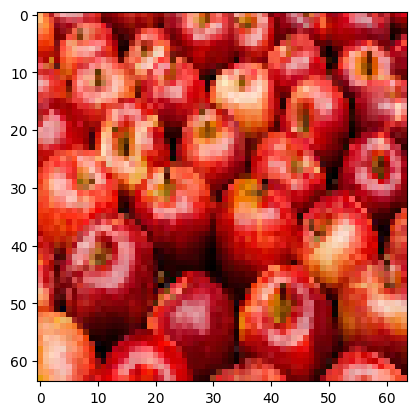

In [ ]:

#imgPlot=plt.imshow(test_image.squeeze())

print(prediction)
plt.imshow(img)